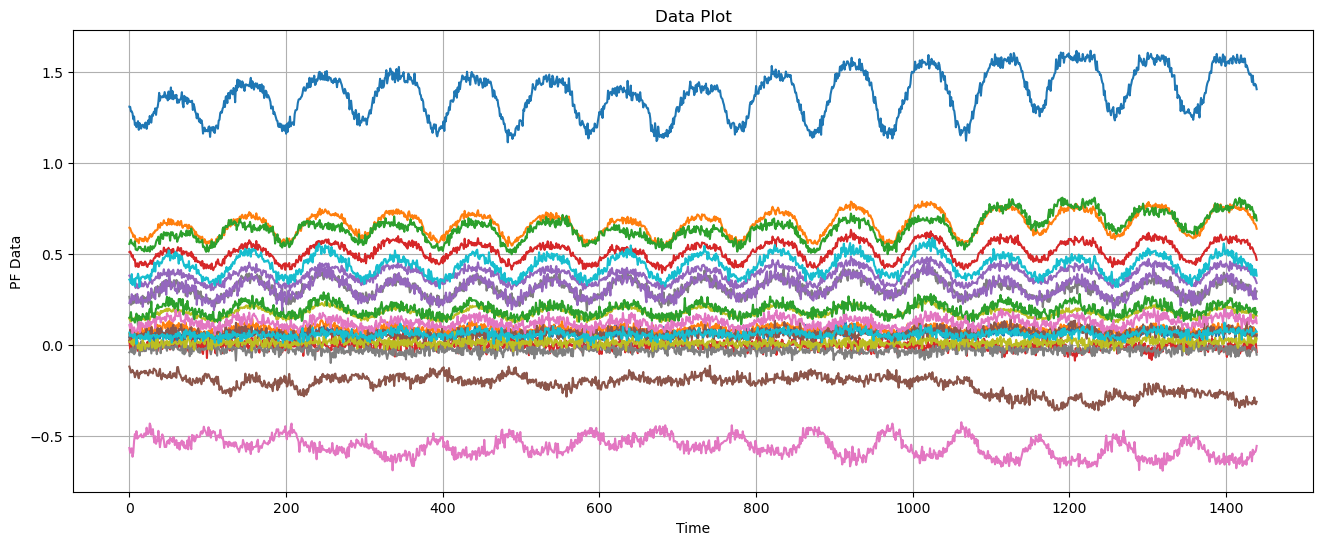

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from scipy.linalg import null_space
from scipy.io import loadmat
# Load MATLAB file
mat_data = loadmat('matpower/Hat20_14.mat')
# Access a variable inside the .mat file
H = mat_data['H']

def read_excel_power(file_path= ""):
    pfData = pd.read_excel(file_path, engine='openpyxl', sheet_name=0, parse_dates=['Timestamp'])
    phaseData = pd.read_excel(file_path, engine='openpyxl', sheet_name=1, parse_dates=['Timestamp'])
    try:
        inject = pd.read_excel(file_path, engine='openpyxl', sheet_name=2, parse_dates=['Timestamp'])
        inject.set_index('Timestamp', inplace=True)
        inject= inject.to_numpy(dtype= np.float64)
    except:
        inject= 0
    pfData.set_index('Timestamp', inplace=True)
    phaseData.set_index('Timestamp', inplace=True)
    pfData= pfData.to_numpy(dtype= np.float64)
    phaseData= phaseData.to_numpy(dtype= np.float64)
    #normalize
    # pfData= pfData/np.linalg.norm(pfData, 1, axis=1, keepdims= True)
    # pfData= pfData-np.mean(pfData, 0, keepdims= True)
    # # Step 2: Calculate the covariance matrix
    # cov_matrix = np.cov(pfData, rowvar=False)
    # # Step 3: Perform eigenvalue decomposition
    # eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    # # Step 4: Construct the whitening matrix
    # epsilon = 1e-4  # A small constant to avoid division by zero
    # whitening_matrix = np.dot(eigenvectors, np.diag(1.0 / np.sqrt(eigenvalues + epsilon)))
    # whitening_matrix = np.dot(whitening_matrix, eigenvectors.T)
    # print(np.linalg.cond(whitening_matrix))
    # # Apply the whitening transformation to the centered data
    # pfData = np.dot(pfData, whitening_matrix)
    return pfData, phaseData
attackPfData, attackPhaseData= read_excel_power("first round/attack_all.xlsx")
attackPfData2, attackPhaseData2= read_excel_power("fdia_data.xlsx")
basePfData, basePhaseData= read_excel_power("first round/base_all.xlsx")
attackPfData3, attackPhaseData3= read_excel_power("fdia_result.xlsx")

data= attackPfData2
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.title('Data Plot')
plt.xlabel('Time')
plt.ylabel('PF Data')
plt.grid(True)
plt.show()

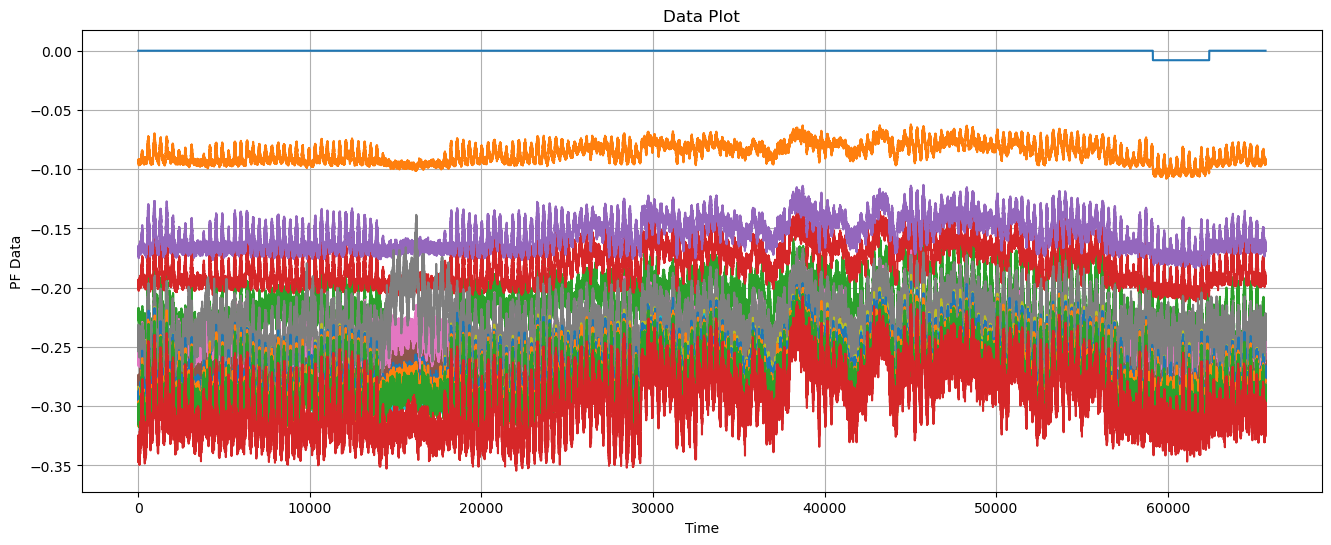

In [93]:
data= attackPhaseData3#-H.dot(attackPhaseData3.T).T
# data= data/np.linalg.norm(data, 1, axis=1, keepdims= True)
# data= data-np.mean(data, 0, keepdims= True)
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.title('Data Plot')
plt.xlabel('Time')
plt.ylabel('PF Data')
plt.grid(True)
plt.show()

In [114]:
traindata= attackPfData3
traindata= traindata/np.linalg.norm(traindata, 1, axis=1, keepdims= True)
traindata= traindata-np.mean(traindata, 0, keepdims= True)#1.38e-16, 3e-17
# Perform SVD
U, Sigma, Vt = np.linalg.svd(traindata.T[:, 50000:], full_matrices=True)

print(U.shape)


# Select columns of U corresponding to non-zero singular values
A = U[:, 14:]
print(A.shape)


nullT= null_space(A.T).T

A_pinv = np.linalg.pinv(A)

# Dm= A.dot(A_pinv)-np.eye(20)

# print(np.linalg.matrix_rank(Dm))

# attackPfData
# basePfData
# attackPfData2
testData= traindata


# print(np.linalg.norm(np.mean(testData, 0, keepdims= True), 2))


# testData= testData/np.linalg.norm(testData, 1, axis=1, keepdims= True)
# testData= testData-np.mean(testData, 0, keepdims= True)#
lengthOfd= np.sqrt(np.sum(np.square(testData), 1, keepdims= True))

ys= np.dot(A_pinv, testData.T)

error= (np.dot(A, ys))

# Error1= error.T

baseLength= np.sqrt(np.sum(np.square(np.dot(A, ys).T), 1, keepdims= True))

sumError= np.sqrt(np.sum(np.square(error.T), 1, keepdims= True))

def apply_mean_filter_2d(data, window_size):
    # Define the filter kernel
    filter_kernel = np.ones(window_size) / window_size
    # Initialize the output array with the same shape as input
    filtered_data = np.zeros((data.shape[0]-window_size+1, data.shape[1]))
    # Apply the filter along each row
    for i in range(data.shape[1]):
        filtered_data[:, i] = np.convolve(data[:, i], filter_kernel, mode='valid')
    return filtered_data

#plt.plot(np.linalg.norm(attackPfData2, 2, 1, keepdims= True))

(20, 20)
(20, 6)


In [120]:
print(np.finfo(np.float80))


AttributeError: module 'numpy' has no attribute 'float80'

Text(0, 0.5, 'Reconstruction Loss')

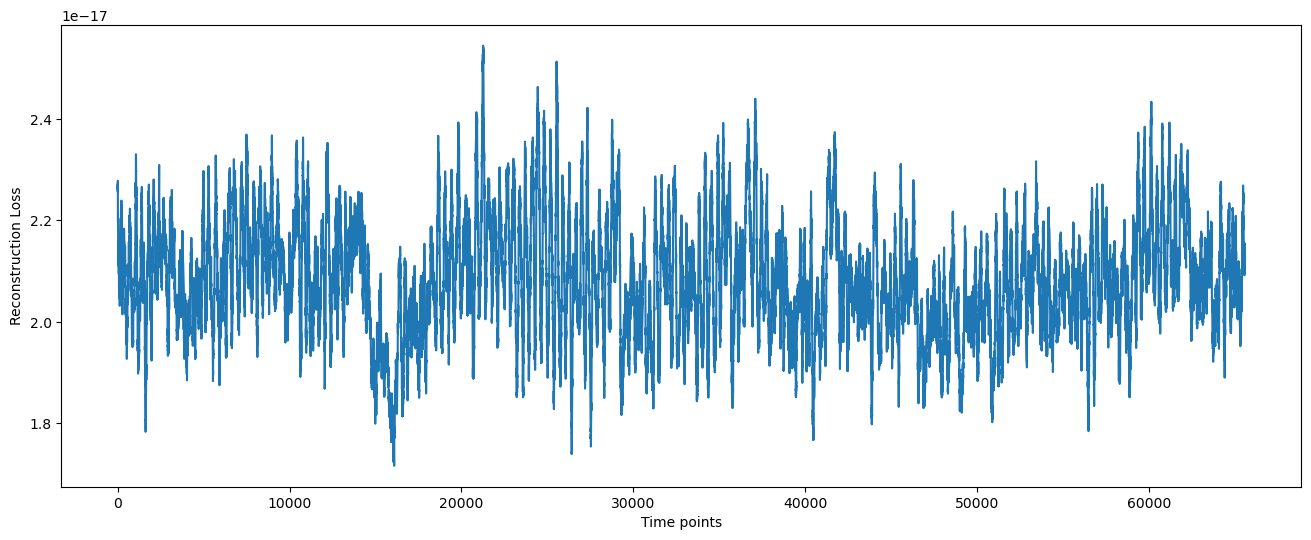

In [117]:
plt.figure(figsize=(16, 6))
# plt.plot(ys.T)
plt.plot(apply_mean_filter_2d(sumError, 100))
# PrecisionError= sumError
# plt.ylim([0e-33, 6e-33])
plt.xlabel("Time points")
plt.ylabel("Reconstruction Loss")

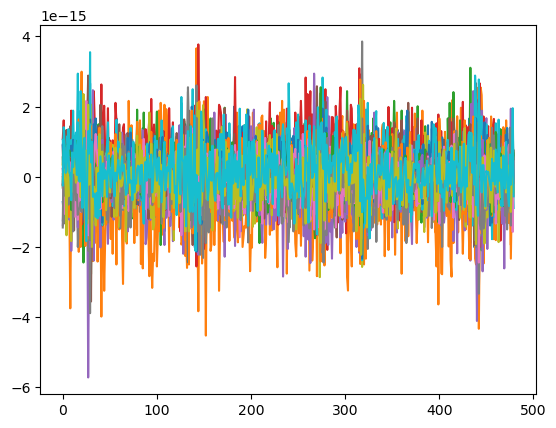

In [3]:
sumErrorsLast= sumErrors
plt.plot(sumErrorsLast)

In [1]:
from scipy.linalg import null_space

print(null_space(A))

UT, ST, VT= np.linalg.svd(A)
print(UT[:, 0:1].shape)
print(UT.shape)

NameError: name 'A' is not defined